### Name : Tiruveedhula Jyothsna Devi
### Slot : 10:00AM - 12:00AM (Morning)
### Email : jyothsna.21bce7712@vitapstudent.ac.in
### Branch : CSE with Spl. in Artificial Intelligence and Machine Learning
### Campus : VIT-AP

## 1.Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Importing the dataset.

In [2]:
dataset = pd.read_csv("titanic.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dataset.shape

(1309, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
corr=dataset.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000


In [8]:
dataset.drop(["Name"],axis=1,inplace=True)

<AxesSubplot: >

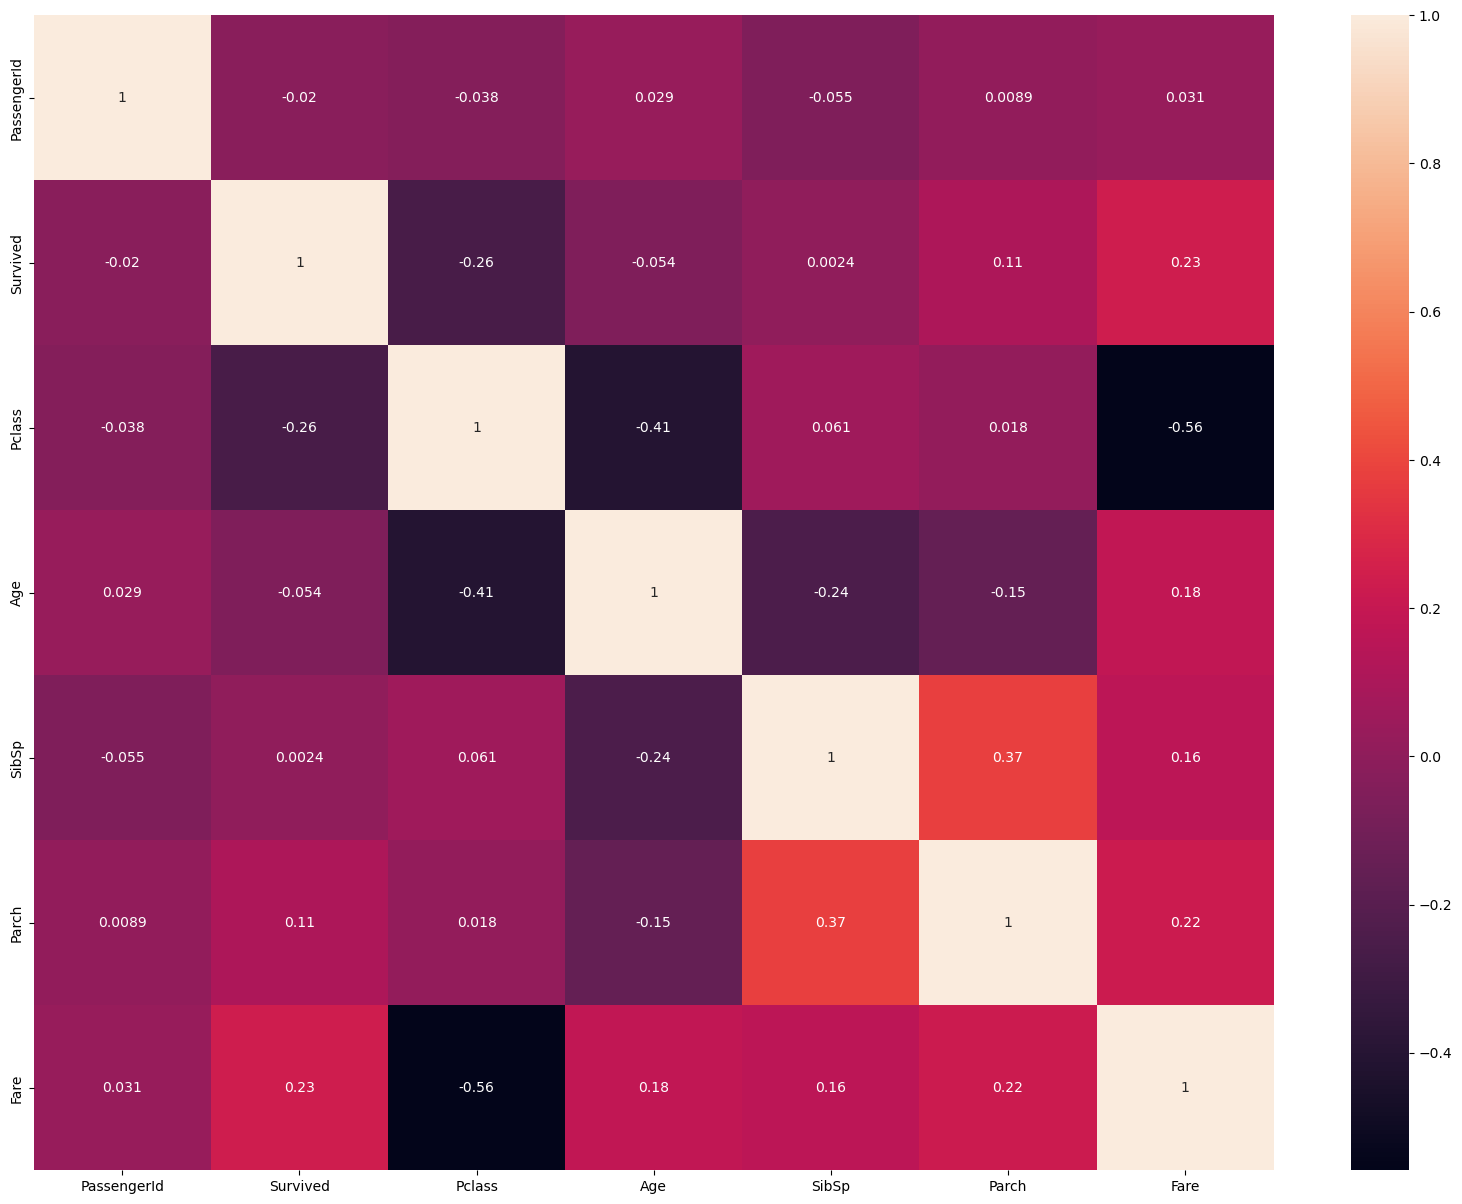

In [9]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

## 3.Handling Null values

In [10]:
dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [11]:
dataset.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
dataset.shape

(1309, 11)

In [13]:
dataset.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
D                  4
                  ..
B80                1
B4                 1
A32                1
C49                1
C148               1
Name: Cabin, Length: 186, dtype: int64

In [14]:
dataset.drop(["Cabin"],axis=1,inplace=True)

### Handling Null value on Embarked column.

In [15]:
dataset.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
dataset['Embarked'].fillna(dataset["Embarked"].mode()[0], inplace=True)

In [17]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

### Handling Null value on Fare column.

In [18]:
dataset.Fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
26.2833     1
7.1417      1
8.6542      1
34.6542     1
10.5167     1
Name: Fare, Length: 281, dtype: int64

In [19]:
dataset['Fare'].fillna(dataset["Fare"].mean(), inplace=True)

In [20]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### Handling Null value on Age column.

In [21]:
dataset.Age.value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
60.5     1
76.0     1
67.0     1
22.5     1
74.0     1
Name: Age, Length: 98, dtype: int64

In [22]:
dataset['Age'].fillna(dataset["Age"].mean(), inplace=True)

In [23]:
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 4.Data Visualization

<AxesSubplot: xlabel='Survived', ylabel='count'>

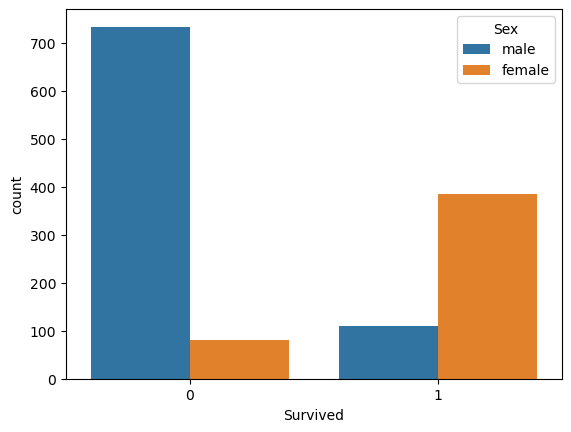

In [24]:
sns.countplot(x='Survived',data=dataset,hue = 'Sex')

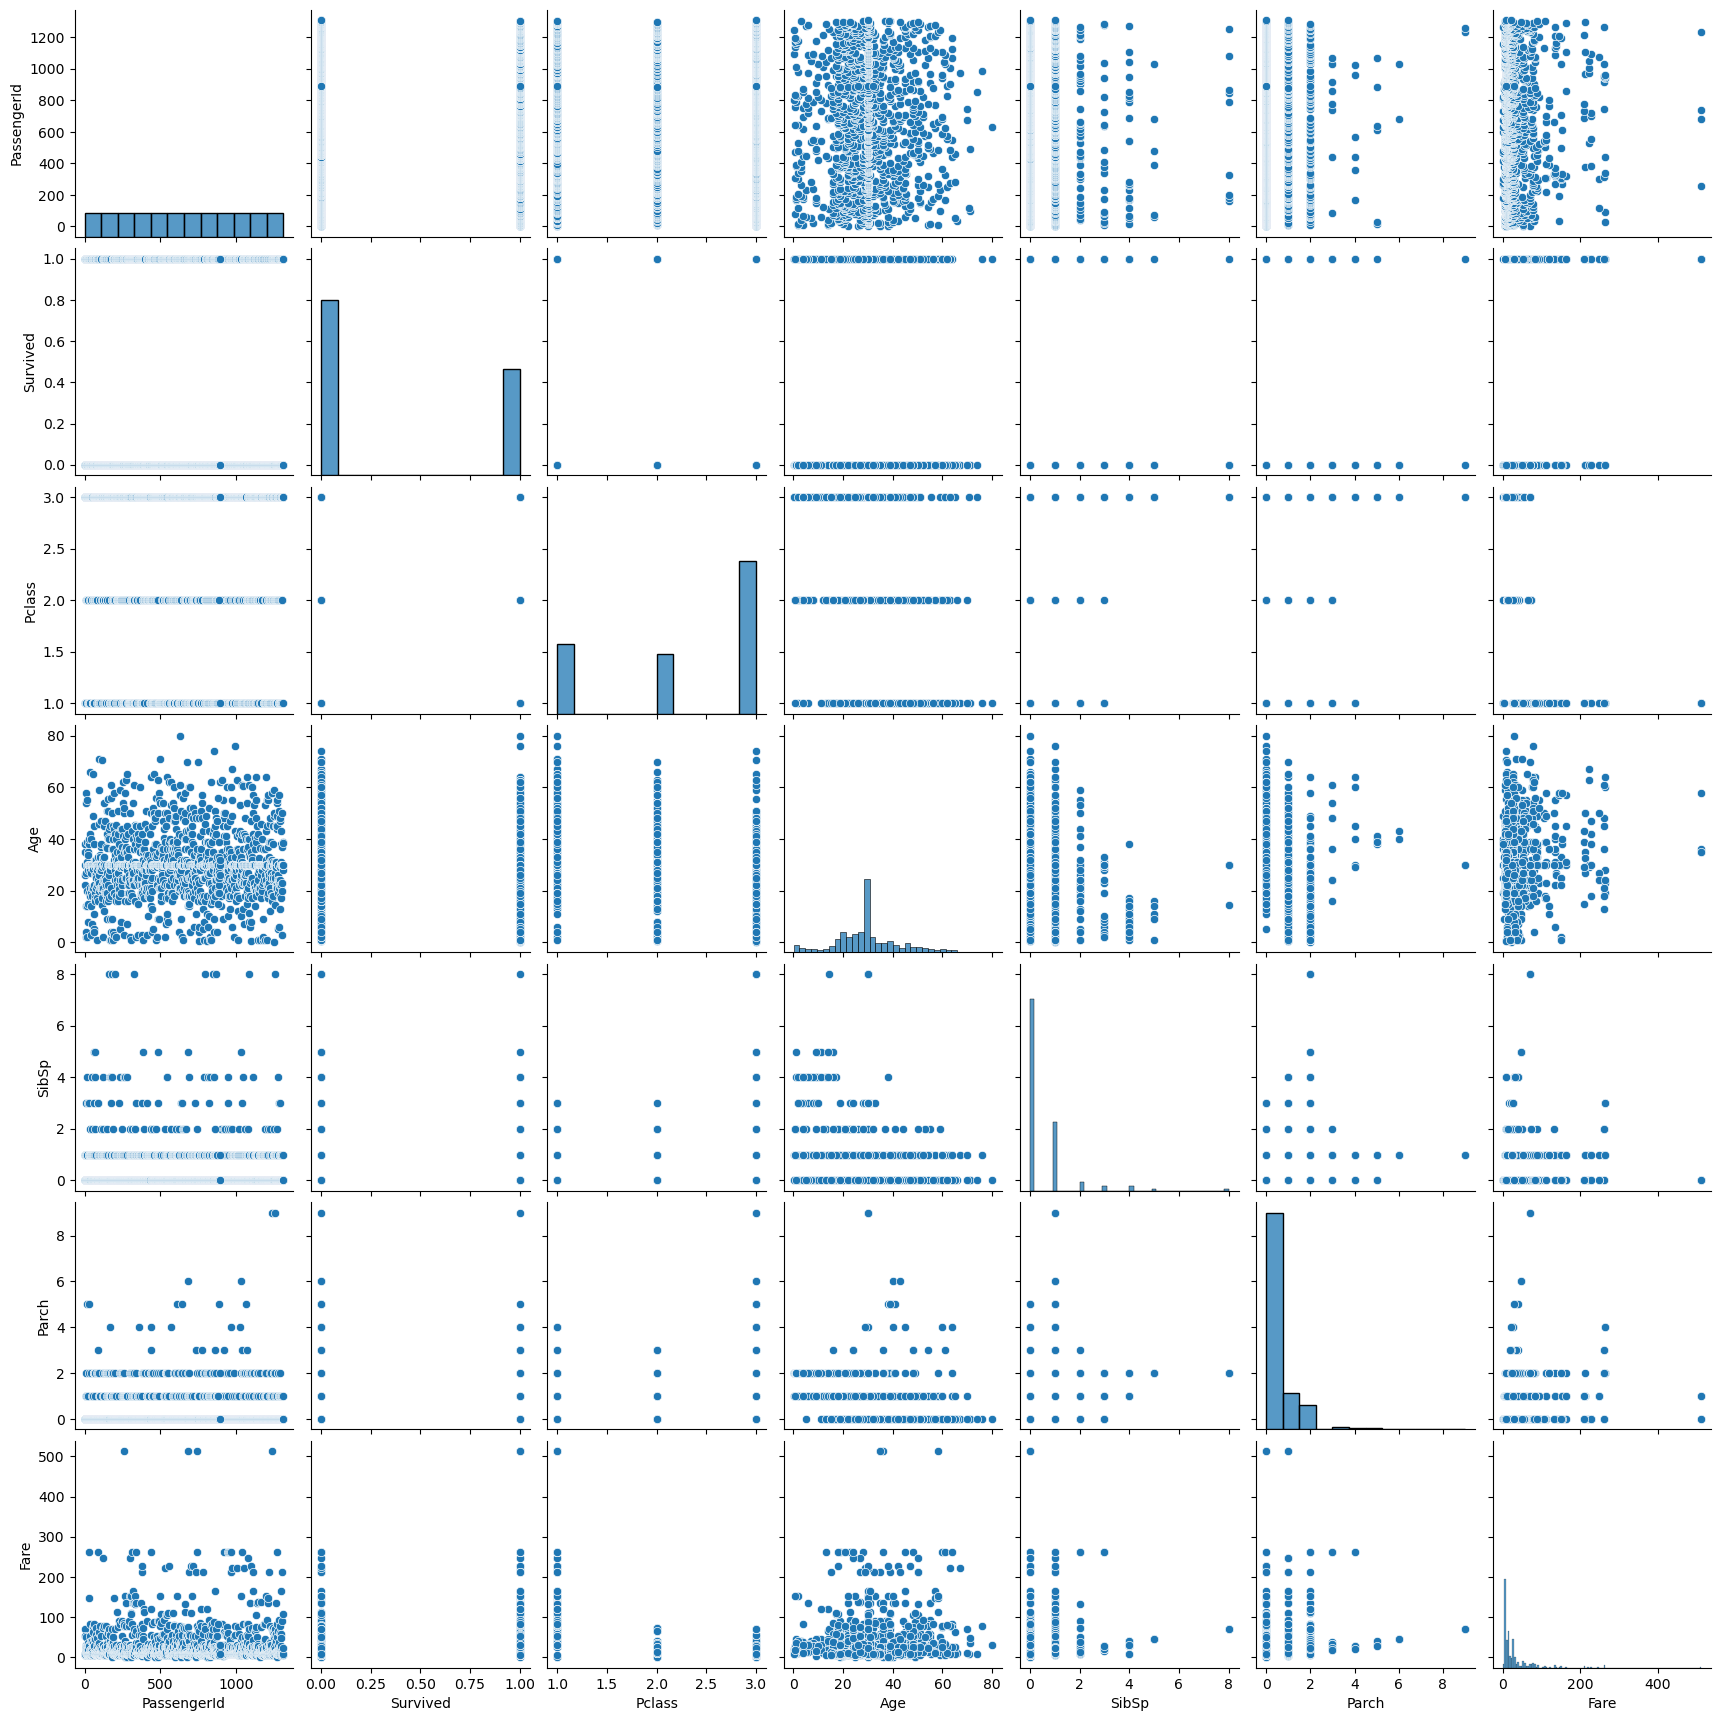

In [25]:
sns.pairplot(dataset)

Text(0.5, 0, 'Passenger Class')

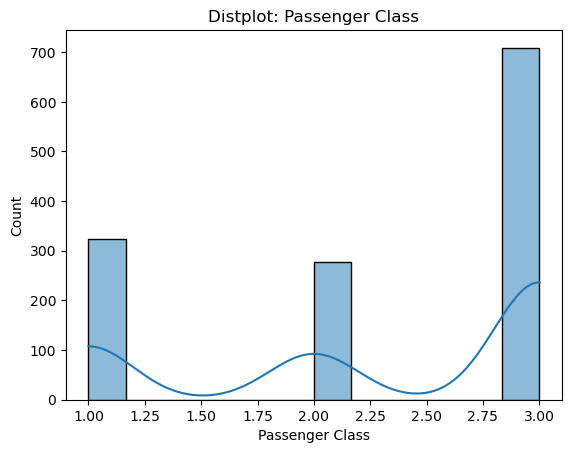

In [26]:
sns.histplot(dataset["Pclass"], kde=True)
plt.title("Distplot: Passenger Class")
plt.xlabel("Passenger Class")

<AxesSubplot: ylabel='Embarked'>

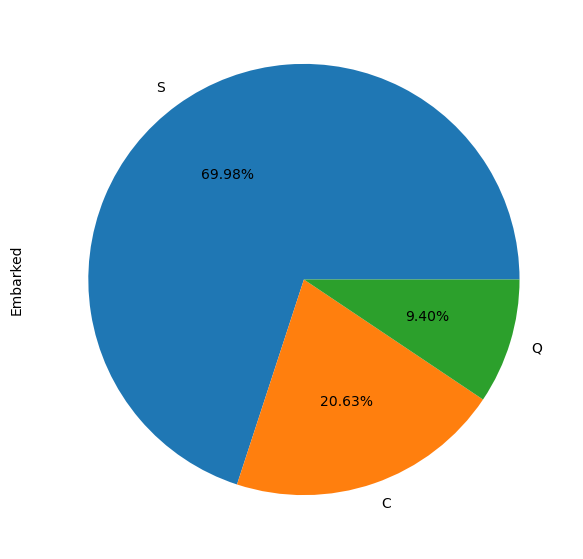

In [27]:
dataset['Embarked'].value_counts().plot(kind='pie',figsize=(7,7),autopct="%0.2f%%")

<AxesSubplot: >

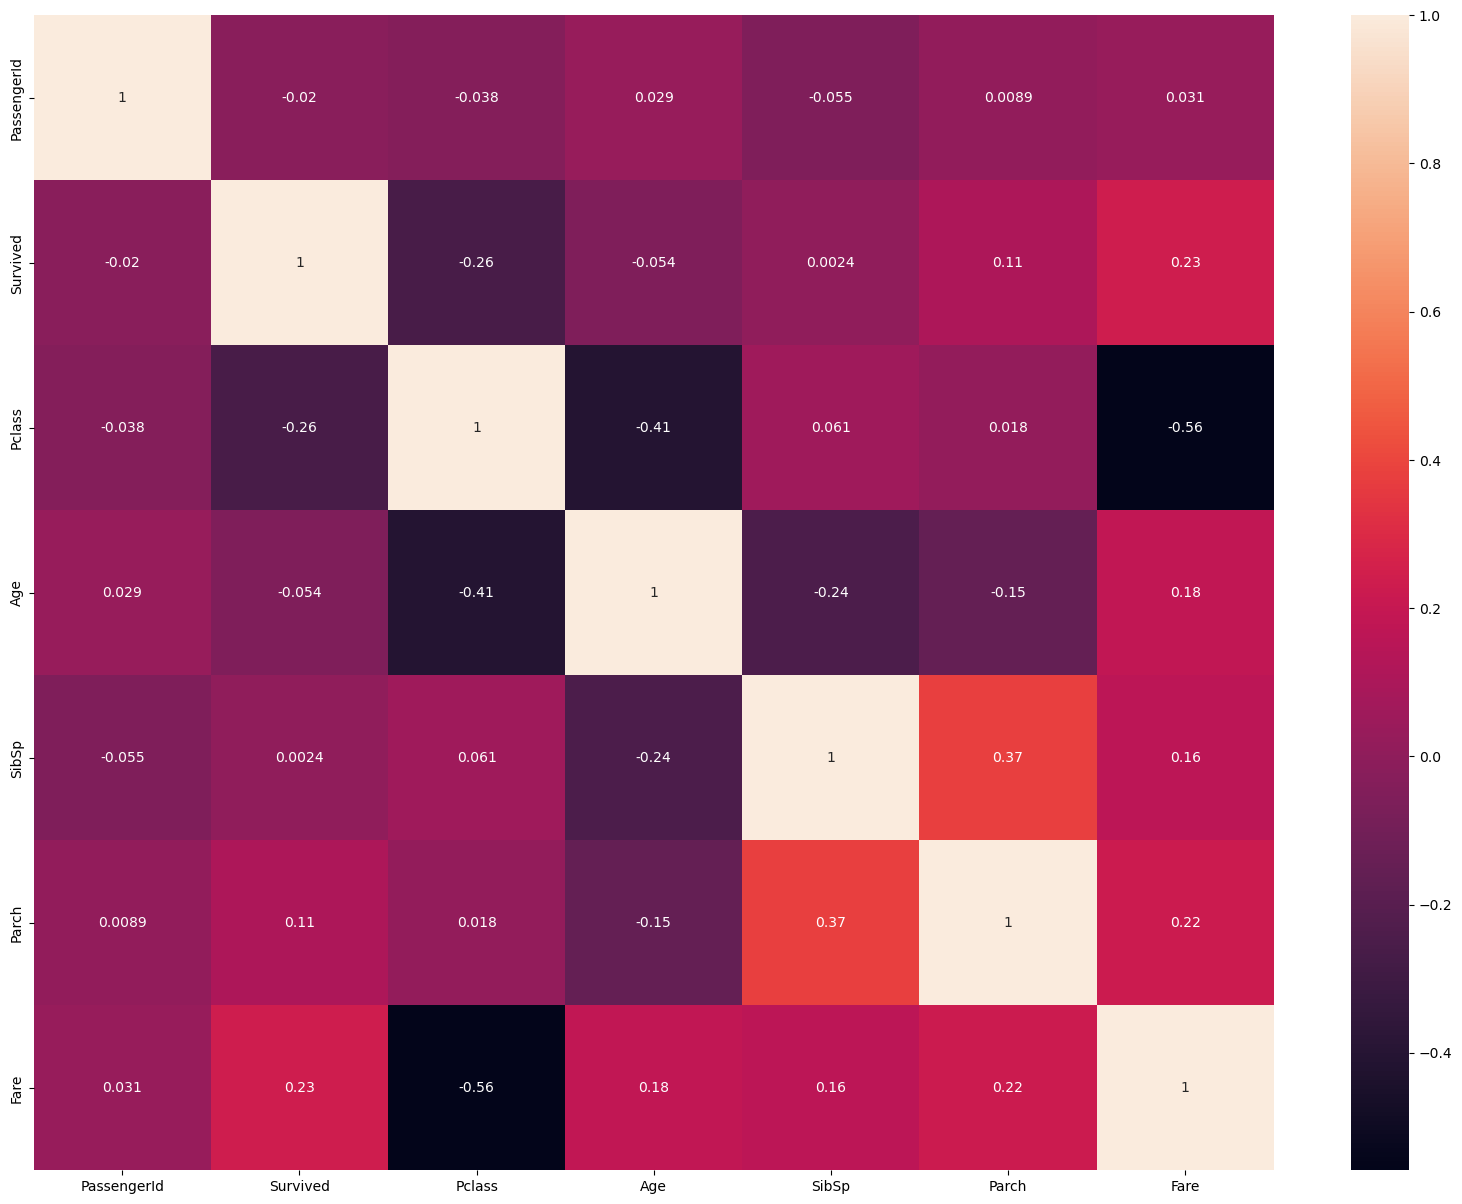

In [28]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

<AxesSubplot: ylabel='Frequency'>

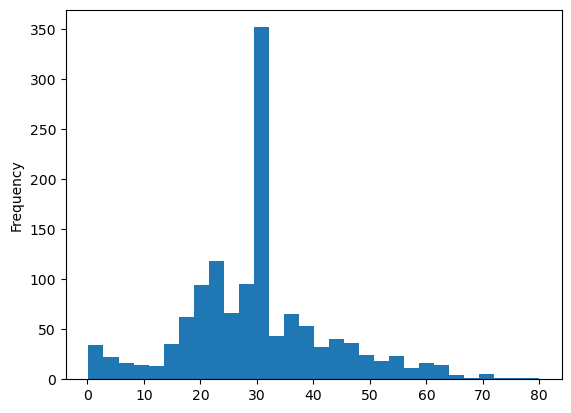

In [29]:
dataset['Age'].dropna().plot.hist(bins=30)

<AxesSubplot: >

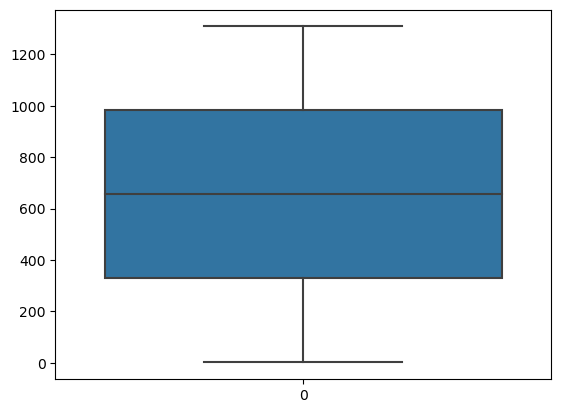

In [30]:
sns.boxplot(dataset.PassengerId)

<AxesSubplot: >

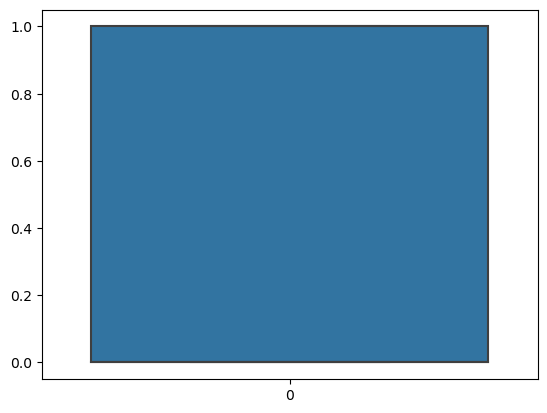

In [31]:
sns.boxplot(dataset.Survived)

<AxesSubplot: >

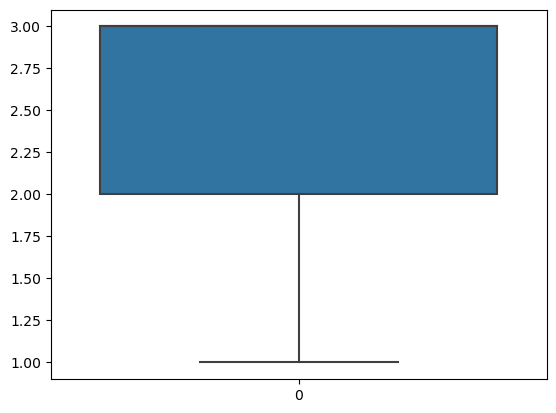

In [32]:
sns.boxplot(dataset.Pclass)

<AxesSubplot: >

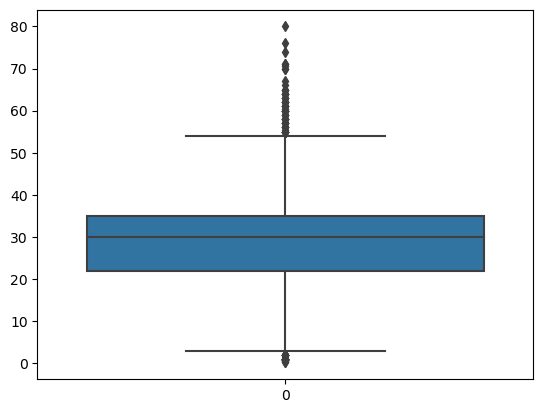

In [33]:
sns.boxplot(dataset.Age)

<AxesSubplot: >

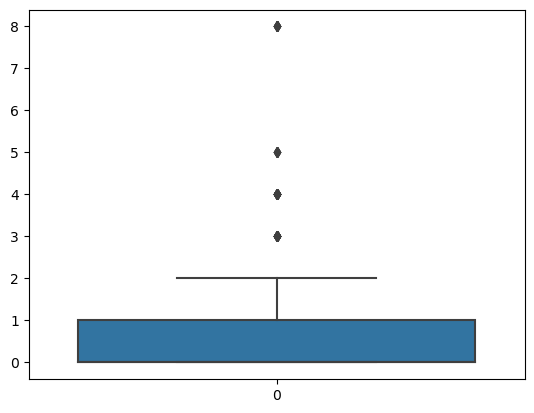

In [34]:
sns.boxplot(dataset.SibSp)

<AxesSubplot: >

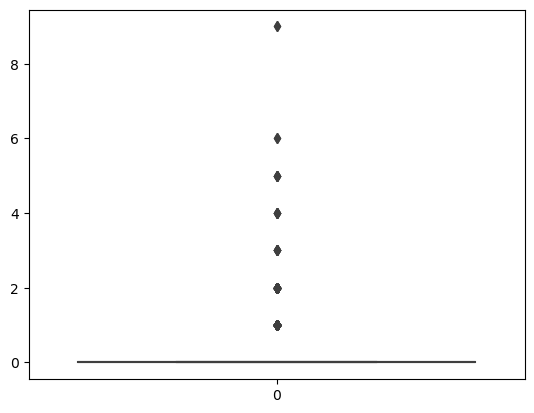

In [35]:
sns.boxplot(dataset.Parch)

<AxesSubplot: >

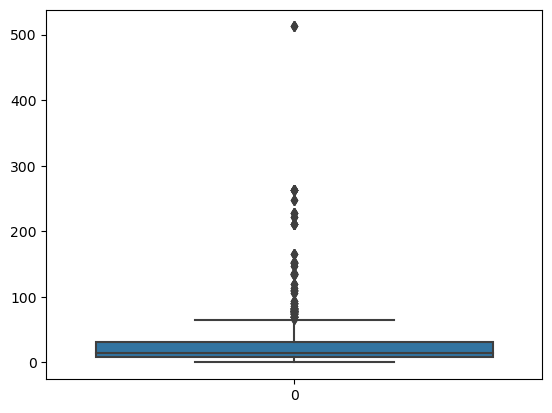

In [36]:
sns.boxplot(dataset.Fare)

## 5.Outlier Detection

In [37]:
dataset.median()

/var/folders/0v/08pwzd_50gqdy5d2ttp9zbqc0000gn/T/ipykernel_2534/4167803218.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.median()


PassengerId    655.000000
Survived         0.000000
Pclass           3.000000
Age             29.881138
SibSp            0.000000
Parch            0.000000
Fare            14.454200
dtype: float64

In [38]:
q1 = dataset.Age.quantile(0.25)
q3 = dataset.Age.quantile(0.75)
print(q1)
print(q3)

22.0
35.0


In [39]:
IQR = q3-q1
print(IQR)

13.0


In [40]:
upper_limit = q3+1.5*IQR
print(upper_limit)

54.5


In [41]:
lower_limit = q1-1.5*IQR
print(lower_limit)

2.5


In [42]:
# replacing with median
dataset['Age'] = np.where(dataset['Age']>upper_limit,655,dataset['Age'])

<AxesSubplot: >

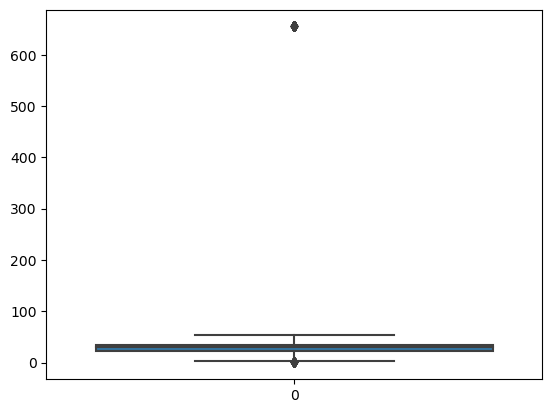

In [43]:
sns.boxplot(dataset.Age)

### Handling Outliers on SibSp Column

In [44]:
q11 = dataset.SibSp.quantile(0.25)
q31 = dataset.SibSp.quantile(0.75)

In [45]:
print(q11)
print(q31)

0.0
1.0


In [46]:
IQR = q31-q11
print(IQR)

1.0


In [47]:
upper_limit = q31+1.5*IQR
print(upper_limit)

2.5


In [48]:
dataset['SibSp'] = np.where(dataset['SibSp']>upper_limit,0,dataset['SibSp'])

In [49]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S
2,894,0,2,male,655.0,0,0,240276,9.6875,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,S


<AxesSubplot: >

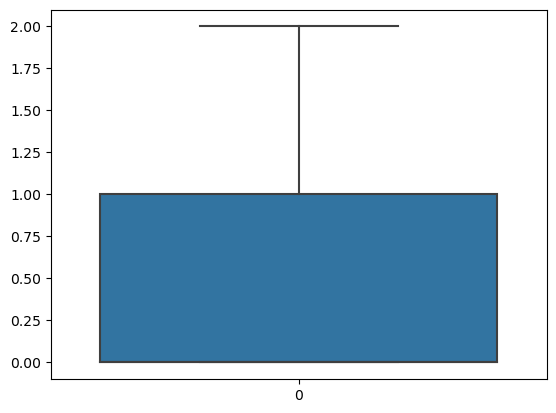

In [50]:
sns.boxplot(dataset.SibSp)

### Handling Outliers on Parch Column

In [51]:
q12 = dataset.Parch.quantile(0.25)
q32 = dataset.Parch.quantile(0.75)

In [52]:
print(q12)
print(q32)

0.0
0.0


In [53]:
IQR = q32-q12
print(IQR)

0.0


In [54]:
upper_limit = q32+1.5*IQR
print(upper_limit)

0.0


In [55]:
dataset['Parch'] = np.where(dataset['Parch']>upper_limit,0,dataset['Parch'])

<AxesSubplot: >

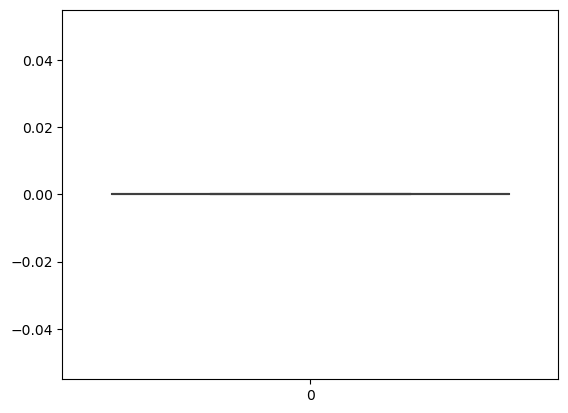

In [56]:
sns.boxplot(dataset.Parch)

### Handling Outliers on Fare Column

In [82]:
q13 = dataset.Fare.quantile(0.25)
q33 = dataset.Fare.quantile(0.75)

In [83]:
print(q13)
print(q33)

7.8958
14.0


In [84]:
IQR = q33-q13
print(IQR)

6.1042


In [85]:
upper_limit = q33+1.5*IQR
print(upper_limit)

23.1563


In [86]:
dataset['Fare'] = np.where(dataset['Fare']>upper_limit,14,dataset['Fare'])

<AxesSubplot: >

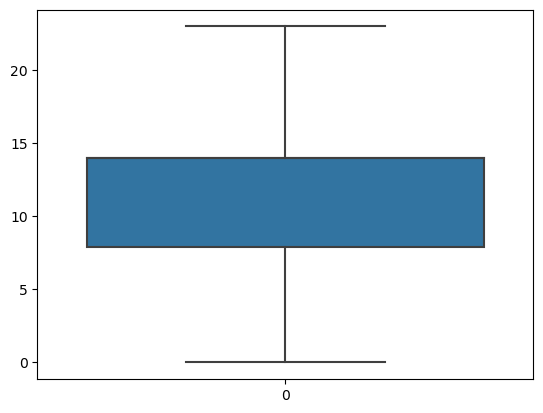

In [87]:
sns.boxplot(dataset.Fare)

## 6.Splitting Dependent and Independent variables

In [88]:
X=dataset.iloc[:,[0,2,3,4,5,6,7,8,9]]

In [89]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,655.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,0,3101298,12.2875,S


In [90]:
type(X)

pandas.core.frame.DataFrame

In [91]:
y=dataset["Survived"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [92]:
type(y)

pandas.core.series.Series

## 7.Perform Encoding

In [93]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,655.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,0,3101298,12.2875,S


In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

### Performing encoding on Sex column

In [95]:
X["Sex"]=le.fit_transform(X["Sex"])

/var/folders/0v/08pwzd_50gqdy5d2ttp9zbqc0000gn/T/ipykernel_2534/3285540237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"]=le.fit_transform(X["Sex"])


In [96]:
X["Sex"]

0       1
1       0
2       1
3       1
4       0
       ..
1304    1
1305    0
1306    0
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [97]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'female': 0, 'male': 1}

In [98]:
X["Sex"].value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [99]:
X["Sex"].nunique()

2

In [100]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,Q
1,893,3,0,47.0,1,0,363272,7.0000,S
2,894,2,1,655.0,0,0,240276,9.6875,Q
3,895,3,1,27.0,0,0,315154,8.6625,S
4,896,3,0,22.0,1,0,3101298,12.2875,S


In [101]:
X.Sex.value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [102]:
Sex=pd.get_dummies(X["Sex"],drop_first=True)

In [103]:
Sex

,1
0,1
1,0
2,1
3,1
4,0
...,...
1304,1
1305,0
1306,0
1307,1


### Performing encoding on embarked column

In [104]:
X["Embarked"]=le.fit_transform(X["Embarked"])

/var/folders/0v/08pwzd_50gqdy5d2ttp9zbqc0000gn/T/ipykernel_2534/1138632405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"]=le.fit_transform(X["Embarked"])


In [105]:
X["Embarked"]

0       1
1       2
2       1
3       2
4       2
       ..
1304    2
1305    2
1306    2
1307    0
1308    1
Name: Embarked, Length: 1309, dtype: int64

In [106]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'C': 0, 'Q': 1, 'S': 2}

In [107]:
X.drop('Ticket', axis=1,inplace = True)

/var/folders/0v/08pwzd_50gqdy5d2ttp9zbqc0000gn/T/ipykernel_2534/1805661966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Ticket', axis=1,inplace = True)


In [108]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,655.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,0,12.2875,2


In [109]:
X.isna().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

## 8.Feature Scaling.

In [110]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [111]:
X_Scaled=ms.fit_transform(X)

In [112]:
X_Scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [113]:
X_Scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.681193,1.0,1.0,0.052426,0.0,0.0,0.340400,0.5
1,0.681957,1.0,0.0,0.071515,0.5,0.0,0.304348,1.0
2,0.682722,0.5,1.0,1.000000,0.0,0.0,0.421196,0.5
3,0.683486,1.0,1.0,0.040972,0.0,0.0,0.376630,1.0
4,0.684251,1.0,0.0,0.033337,0.5,0.0,0.534239,1.0


## 9.Splitting Data into Train and Test

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [115]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((916, 8), (393, 8), (916,), (393,))